<a href="https://colab.research.google.com/github/vijaysriya13/DataEngineering/blob/main/AdventureCycles_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

In [2]:
import pandas as pd
import pyspark.pandas as ps

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


#Lets import CSV files into PySpark

In [3]:
#import in pandas
url_address = 'https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/Address.csv'
url_customer = 'https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/Customer.csv'
url_customer_addr = 'https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/CustomerAddress.csv'
url_product = 'https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/Product.csv'
url_product_cat='https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/ProductCategory.csv'
url_product_desc='https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/ProductDescription.csv'
url_product_model='https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/ProductModel.csv'
url_prod_model_desc='https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/ProductModelProductDescription.csv'
url_sales_order_det='https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/SalesOrderDetail.csv'
url_sales_order_head='https://raw.githubusercontent.com/Kiran-255666/AdventureWorks/main/Adventureworks/SalesOrderHeader.csv'

df_address = pd.read_csv(url_address,encoding='latin-1')
df_customer = pd.read_csv(url_customer,encoding='latin-1')
df_customer_addr = pd.read_csv(url_customer_addr)
df_product = pd.read_csv(url_product)
df_product_cat = pd.read_csv(url_product_cat)
df_product_model = pd.read_csv(url_product_model)
df_product_desc = pd.read_csv(url_product_desc,encoding='latin-1')
df_prod_model_desc = pd.read_csv(url_prod_model_desc)
df_sales_order_det = pd.read_csv(url_sales_order_det)
df_sales_order_head = pd.read_csv(url_sales_order_head)

In [4]:
#Convert from Pandas DF to Pandas API on PySpark df
psdf_address = ps.from_pandas(df_address)
psdf_customer = ps.from_pandas(df_customer)
psdf_customer_addr = ps.from_pandas(df_customer_addr)
psdf_product = ps.from_pandas(df_product)
psdf_product_cat = ps.from_pandas(df_product_cat)
psdf_product_desc = ps.from_pandas(df_product_desc)
psdf_product_model = ps.from_pandas(df_product_model)
psdf_prod_model_desc = ps.from_pandas(df_prod_model_desc)
psdf_sales_order_det= ps.from_pandas(df_sales_order_det)
psdf_sales_order_head = ps.from_pandas(df_sales_order_head)

#EDA - Address Table


In [5]:
psdf_address.head()


,AddressID,AddressLine1,AddressLine2,City,StateProvince,CountryRegion,PostalCode,rowguid,ModifiedDate
0,9,8713 Yosemite Ct.,None,Bothell,Washington,United States,98011,268AF621-76D7-4C78-9441-144FD139821A,00:00.0
1,11,1318 Lasalle Street,None,Bothell,Washington,United States,98011,981B3303-ACA2-49C7-9A96-FB670785B269,00:00.0
2,25,9178 Jumping St.,None,Dallas,Texas,United States,75201,C8DF3BD9-48F0-4654-A8DD-14A67A84D3C6,00:00.0
3,28,9228 Via Del Sol,None,Phoenix,Arizona,United States,85004,12AE5EE1-FC3E-468B-9B92-3B970B169774,00:00.0
4,32,26910 Indela Road,None,Montreal,Quebec,Canada,H1Y 2H5,84A95F62-3AE8-4E7E-BBD5-5A6F00CD982D,00:00.0


In [6]:
psdf_address.shape

(450, 9)

In [7]:
#We have 450 rows with 9 characteristics, however rowguid and modifieddate may not be that useful , hence we will drop it
psdf_address = psdf_address.drop(['rowguid','ModifiedDate'],axis=1)

In [8]:
#Seems like we have multiple countries , lets group them and see count
psdf_address.groupby(['CountryRegion']).size().reset_index(name='counts')


,CountryRegion,counts
0,United States,295
1,Canada,115
2,United Kingdom,40


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='CountryRegion', ylabel='count'>

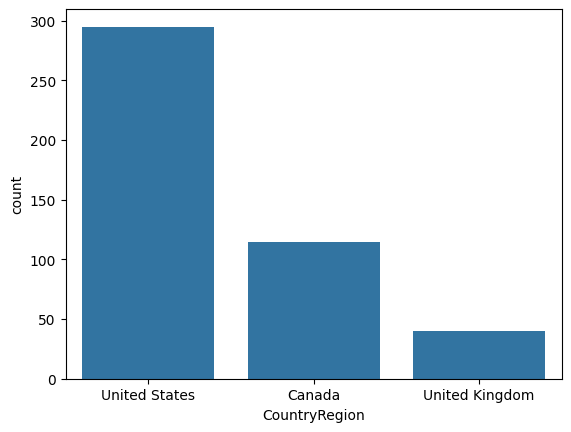

In [9]:
import seaborn as sns
sns.countplot(psdf_address.to_pandas(),x='CountryRegion')

In [10]:
#In Canada, Ontario seems to have the highest Sales, whereas Cali leads in US
psdf_address.groupby(['CountryRegion','StateProvince']).size().reset_index(name='counts').sort_values(by=['CountryRegion','counts'])

,CountryRegion,StateProvince,counts
14,Canada,Brunswick,1
1,Canada,Manitoba,2
5,Canada,Alberta,13
7,Canada,British Columbia,20
11,Canada,Quebec,24
9,Canada,Ontario,55
8,United Kingdom,England,40
13,United States,South Dakota,2
15,United States,Montana,3
17,United States,Idaho,3


#EDA - Customer Table

In [11]:
psdf_customer.shape

(847, 15)

In [12]:
psdf_customer.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate
0,1,0,Mr.,Orlando,N.,Gee,None,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,00:00.0
1,2,0,Mr.,Keith,None,Harris,None,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,00:00.0
2,3,0,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,00:00.0
3,4,0,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,00:00.0
4,5,0,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,00:00.0


In [13]:
psdf_customer = psdf_customer.drop(['PasswordHash','PasswordSalt','rowguid','ModifiedDate','Phone','EmailAddress'],axis=1)

In [14]:
psdf_customer.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson
0,1,0,Mr.,Orlando,N.,Gee,None,A Bike Store,adventure-works\pamela0
1,2,0,Mr.,Keith,None,Harris,None,Progressive Sports,adventure-works\david8
2,3,0,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,adventure-works\jillian0
3,4,0,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,adventure-works\jillian0
4,5,0,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,adventure-works\shu0


In [15]:
psdf_customer.groupby(['Title']).size()

Title
Sra.      4
Ms.     340
None      7
Mr.     490
Sr.       6
dtype: int64

In [16]:
salesperson=psdf_customer["SalesPerson"].str.split("adventure-works",n=1,expand=True)
salesperson = salesperson[1].str.replace("\\","")
psdf_customer['SalesPerson']=salesperson

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/strings.py:1608: FutureWarning: Default value of `regex` will be changed to `False` instead of `True` in 4.0.0.
  warnings.warn(


In [17]:
psdf_customer.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson
0,1,0,Mr.,Orlando,N.,Gee,None,A Bike Store,pamela0
1,2,0,Mr.,Keith,None,Harris,None,Progressive Sports,david8
2,3,0,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,jillian0
3,4,0,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,jillian0
4,5,0,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,shu0


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='SalesPerson', ylabel='count'>

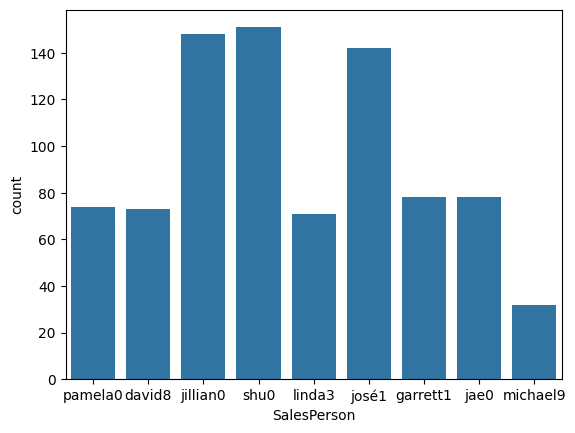

In [18]:
sns.countplot(psdf_customer.to_pandas(),x='SalesPerson')

#EDA - CustomerAddress


In [19]:
psdf_customer_addr.shape

(417, 5)

In [20]:
psdf_customer_addr.head()

,CustomerID,AddressID,AddressType,rowguid,ModifiedDate
0,29485,1086,Main Office,16765338-DBE4-4421-B5E9-3836B9278E63,00:00.0
1,29486,621,Main Office,22B3E910-14AF-4ED5-8B4D-23BBE757414D,00:00.0
2,29489,1069,Main Office,A095C88B-D7E6-4178-A078-2ECA44214801,00:00.0
3,29490,887,Main Office,F12E1702-D897-4035-B614-0FE2C72168A9,00:00.0
4,29492,618,Main Office,5B3B3EB2-3F43-47ED-A20C-23697DABF23B,00:00.0


In [21]:
psdf_customer_addr = psdf_customer_addr.drop(['rowguid','ModifiedDate'],axis=1)

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='AddressType', ylabel='count'>

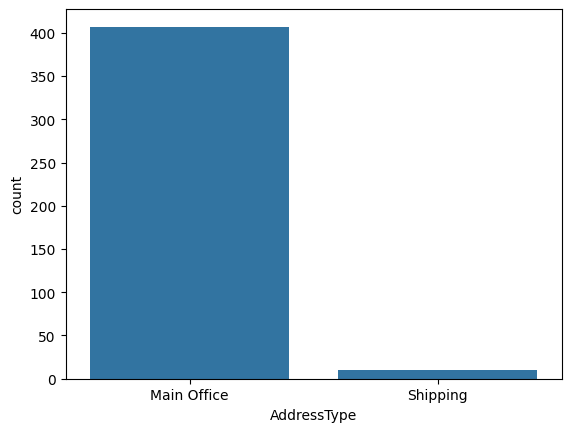

In [22]:
sns.countplot(psdf_customer_addr.to_pandas(),x='AddressType')

#EDA - Product Table

In [23]:
psdf_product.shape

(295, 17)

In [24]:
psdf_product.head()

,ProductID,Name,ProductNumber,Color,StandardCost,ListPrice,Size,Weight,ProductCategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,ThumbNailPhoto,ThumbnailPhotoFileName,rowguid,ModifiedDate
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.3100,1431.50,58,1016.04,18,6,00:00.0,None,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,43DD68D6-14A4-461F-9069-55309D90EA7E,01:36.8
1,706,"HL Road Frame - Red, 58",FR-R92R-58,Red,1059.3100,1431.50,58,1016.04,18,6,00:00.0,None,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,9540FF17-2712-4C90-A3D1-8CE5568B2462,01:36.8
2,707,"Sport-100 Helmet, Red",HL-U509-R,Red,13.0863,34.99,None,NaN,35,33,00:00.0,None,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712,01:36.8
3,708,"Sport-100 Helmet, Black",HL-U509,Black,13.0863,34.99,None,NaN,35,33,00:00.0,None,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,A25A44FB-C2DE-4268-958F-110B8D7621E2,01:36.8
4,709,"Mountain Bike Socks, M",SO-B909-M,White,3.3963,9.50,M,NaN,27,18,00:00.0,00:00.0,NaN,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif,18F95F47-1540-4E02-8F1F-CC1BCB6828D0,01:36.8


In [25]:
psdf_product = psdf_product.drop(['SellStartDate','SellEndDate','rowguid','ModifiedDate','DiscontinuedDate'],axis=1)

In [26]:
psdf_product.head()

,ProductID,Name,ProductNumber,Color,StandardCost,ListPrice,Size,Weight,ProductCategoryID,ProductModelID,ThumbNailPhoto,ThumbnailPhotoFileName
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.3100,1431.50,58,1016.04,18,6,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif
1,706,"HL Road Frame - Red, 58",FR-R92R-58,Red,1059.3100,1431.50,58,1016.04,18,6,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif
2,707,"Sport-100 Helmet, Red",HL-U509-R,Red,13.0863,34.99,None,NaN,35,33,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif
3,708,"Sport-100 Helmet, Black",HL-U509,Black,13.0863,34.99,None,NaN,35,33,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif
4,709,"Mountain Bike Socks, M",SO-B909-M,White,3.3963,9.50,M,NaN,27,18,0x47494638396150003100F70000000000800000008000...,no_image_available_small.gif


In [27]:
psdf_product = psdf_product.drop(['ThumbNailPhoto'],axis=1)

In [28]:
psdf_product.head()

,ProductID,Name,ProductNumber,Color,StandardCost,ListPrice,Size,Weight,ProductCategoryID,ProductModelID,ThumbnailPhotoFileName
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.3100,1431.50,58,1016.04,18,6,no_image_available_small.gif
1,706,"HL Road Frame - Red, 58",FR-R92R-58,Red,1059.3100,1431.50,58,1016.04,18,6,no_image_available_small.gif
2,707,"Sport-100 Helmet, Red",HL-U509-R,Red,13.0863,34.99,None,NaN,35,33,no_image_available_small.gif
3,708,"Sport-100 Helmet, Black",HL-U509,Black,13.0863,34.99,None,NaN,35,33,no_image_available_small.gif
4,709,"Mountain Bike Socks, M",SO-B909-M,White,3.3963,9.50,M,NaN,27,18,no_image_available_small.gif


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='Color', ylabel='count'>

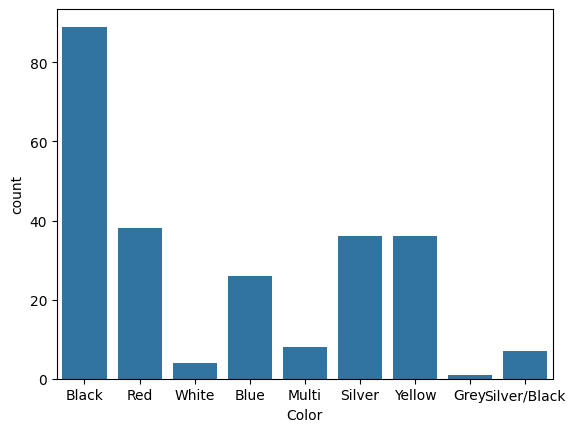

In [29]:
sns.countplot(psdf_product.to_pandas(),x='Color')

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='ProductCategoryID', ylabel='count'>

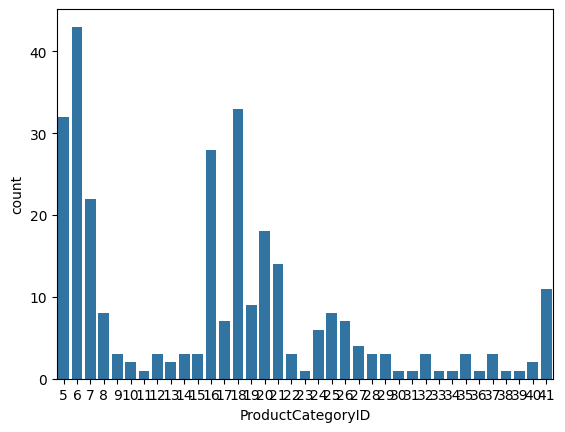

In [30]:
sns.countplot(psdf_product.to_pandas(),x='ProductCategoryID')

#EDA - Product Category Table

In [31]:
psdf_product_cat.shape

(41, 5)

In [32]:
psdf_product_cat.head()

,ProductCategoryID,ParentProductCategoryID,Name,rowguid,ModifiedDate
0,1,NaN,Bikes,CFBDA25C-DF71-47A7-B81B-64EE161AA37C,00:00.0
1,2,NaN,Components,C657828D-D808-4ABA-91A3-AF2CE02300E9,00:00.0
2,3,NaN,Clothing,10A7C342-CA82-48D4-8A38-46A2EB089B74,00:00.0
3,4,NaN,Accessories,2BE3BE36-D9A2-4EEE-B593-ED895D97C2A6,00:00.0
4,5,1.0,Mountain Bikes,2D364ADE-264A-433C-B092-4FCBF3804E01,00:00.0


In [33]:
psdf_product_cat = psdf_product_cat.drop(['rowguid','ModifiedDate'],axis=1)

In [34]:
psdf_product_cat['ParentProductCategoryID']=psdf_product_cat['ParentProductCategoryID'].fillna(0)
psdf_product_cat.astype({'ParentProductCategoryID':'int'})
psdf_product_cat.loc[psdf_product_cat.ParentProductCategoryID==0,'ParentProductCategoryID']=psdf_product_cat.ProductCategoryID


In [35]:
psdf_product_cat.head()

,ProductCategoryID,ParentProductCategoryID,Name
0,1,1.0,Bikes
1,2,2.0,Components
2,3,3.0,Clothing
3,4,4.0,Accessories
4,5,1.0,Mountain Bikes


In [36]:
psdf_product_cat = psdf_product_cat.astype({'ParentProductCategoryID':'int','ProductCategoryID':'int'})

In [37]:
psdf_product_cat.head()

,ProductCategoryID,ParentProductCategoryID,Name
0,1,1,Bikes
1,2,2,Components
2,3,3,Clothing
3,4,4,Accessories
4,5,1,Mountain Bikes


In [38]:
psdf_product_cat_modified=pd.merge(psdf_product_cat.to_pandas(),psdf_product_cat.to_pandas(),on=["ParentProductCategoryID"],how="left")

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [39]:
psdf_product_cat_modified = psdf_product_cat_modified.drop(['ProductCategoryID_x','ParentProductCategoryID'],axis=1).rename(columns={'Name_x':'Category','Name_y':'Product'})



In [40]:
psdf_product_cat_modified = psdf_product_cat_modified[psdf_product_cat_modified['Category']!=psdf_product_cat_modified['Product']]


In [41]:
psdf_product_cat_modified = psdf_product_cat_modified.rename(columns={'ProductCategoryID_y':'ProductID'})

In [42]:
psdf_product_cat_modified.head()

,Category,ProductID,Product
1,Bikes,5,Mountain Bikes
2,Bikes,6,Road Bikes
3,Bikes,7,Touring Bikes
5,Components,8,Handlebars
6,Components,9,Bottom Brackets


In [43]:
psdf_product_cat_modified.groupby(['Category']).size()

Category
Accessories          12
Bib-Shorts            8
Bike Racks           12
Bike Stands          12
Bikes                 3
Bottles and Cages    12
Bottom Brackets      14
Brakes               14
Caps                  8
Chains               14
Cleaners             12
Clothing              8
Components           14
Cranksets            14
Derailleurs          14
Fenders              12
Forks                14
Gloves                8
Handlebars           14
Headsets             14
Helmets              12
Hydration Packs      12
Jerseys               8
Lights               12
Locks                12
Mountain Bikes        3
Mountain Frames      14
Panniers             12
Pedals               14
Pumps                12
Road Bikes            3
Road Frames          14
Saddles              14
Shorts                8
Socks                 8
Tights                8
Tires and Tubes      12
Touring Bikes         3
Touring Frames       14
Vests                 8
Wheels               14
dtype: 

<Axes: xlabel='Category', ylabel='count'>

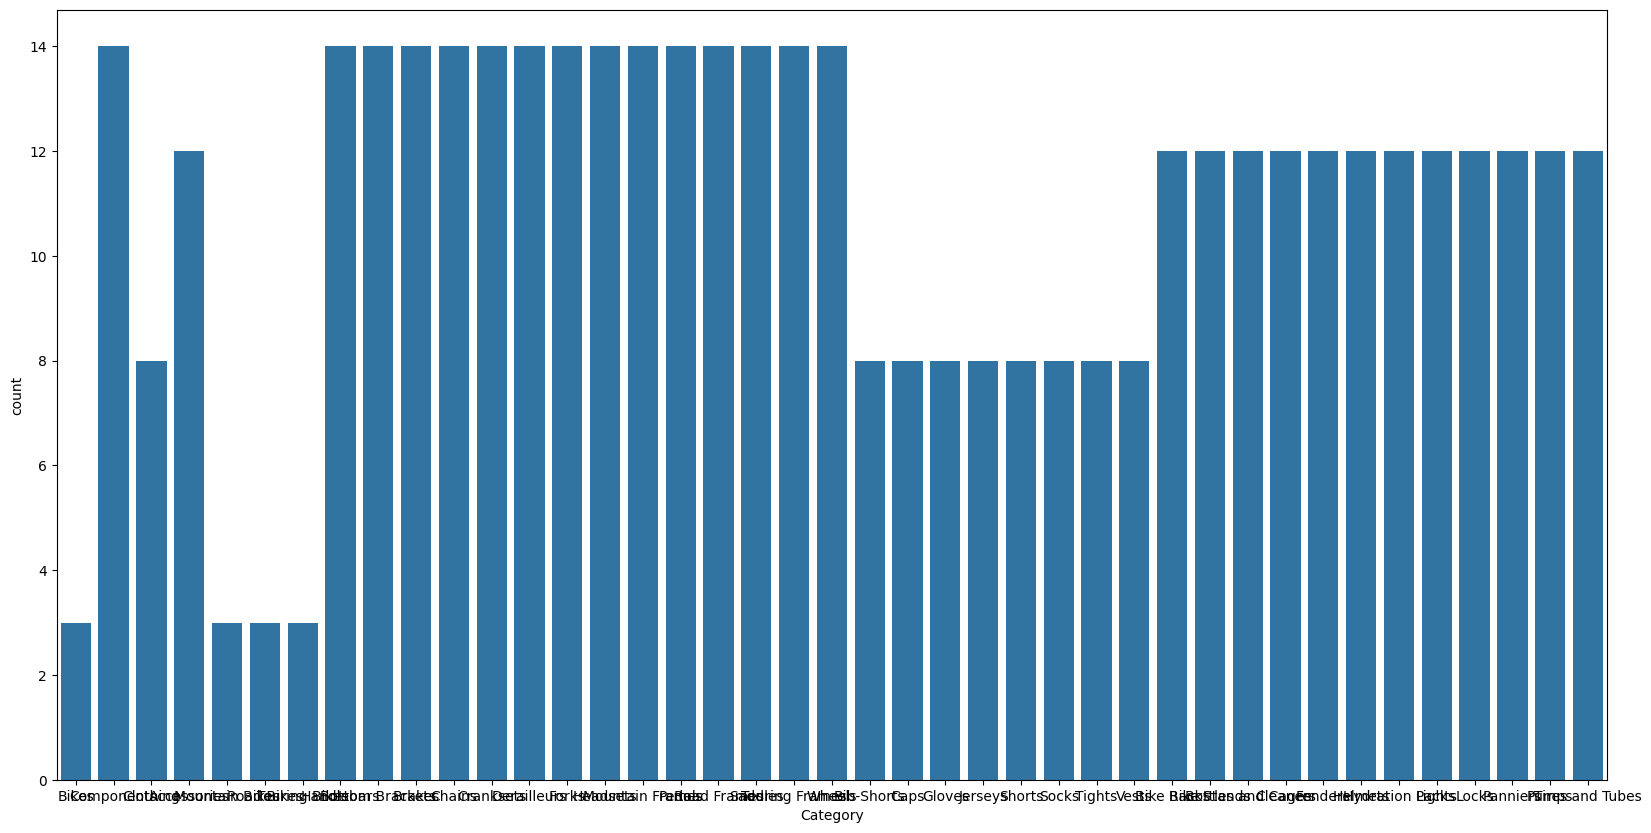

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(psdf_product_cat_modified,x='Category',ax=ax,)

#EDA - Product Model Table

In [45]:
psdf_product_model.shape

(165, 5)

In [46]:
psdf_product_model.head()

,ProductModelID,Name,CatalogDescription,rowguid,ModifiedDate
0,1,Classic Vest,None,29321D47-1E4C-4AAC-887C-19634328C25E,00:00.0
1,2,Cycling Cap,None,474FB654-3C96-4CB9-82DF-2152EEFFBDB0,00:00.0
2,3,Full-Finger Gloves,None,A75483FE-3C47-4AA4-93CF-664B51192987,00:00.0
3,4,Half-Finger Gloves,None,14B56F2A-D4AA-40A4-B9A2-984F165ED702,00:00.0
4,5,HL Mountain Frame,None,FDD5407B-C2DB-49D1-A86B-C13A2E3582A2,00:00.0


In [47]:
psdf_product_model = psdf_product_model.drop(['rowguid','ModifiedDate'],axis=1)

In [48]:
psdf_product_model.groupby(['CatalogDescription']).size()

CatalogDescription
56:38.3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3
<?xml-stylesheet href="ProductDescription.xsl" type="text/xsl"?><p1:ProductDescription xmlns:p1="http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/ProductModelDescription" xmlns:wm="http://schemas.microsoft.com/sqlserver/2004/07/adventure-works/ProductModelWarrAndMain" xmlns:wf="http://www.adventure-works.com/schemas/OtherFeatures" xmlns:html="http://www.w3.org/1999/xhtml" ProductModelID="25" ProductModelName="Road-15

#EDA - Product Model Desc

In [49]:
psdf_prod_model_desc.shape

(762, 5)

In [50]:
psdf_prod_model_desc.head()

,ProductModelID,ProductDescriptionID,Culture,rowguid,ModifiedDate
0,1,1199,en,4D00B649-027A-4F99-A380-F22A46EC8638,00:00.0
1,1,1467,ar,7DE7204E-4EFC-40F7-B9E6-0CEB4162399C,00:00.0
2,1,1589,fr,20BFFCF4-BFA6-400B-BF34-9A689779EAE4,00:00.0
3,1,1712,th,AF18BC29-F378-4512-A59B-D55217F4F82B,00:00.0
4,1,1838,he,23830AC3-3B16-49D1-9BA1-3A8996F0FA7A,00:00.0


In [51]:
psdf_prod_model_desc = psdf_prod_model_desc.drop(['rowguid','ModifiedDate'],axis=1)

In [52]:
psdf_prod_model_desc.head()

,ProductModelID,ProductDescriptionID,Culture
0,1,1199,en
1,1,1467,ar
2,1,1589,fr
3,1,1712,th
4,1,1838,he


#EDA - Product Desc Table


In [53]:
psdf_product_desc.shape

(762, 4)

In [54]:
psdf_product_desc.head()

,ProductDescriptionID,Description,rowguid,ModifiedDate
0,3,Chromoly steel.,301EED3A-1A82-4855-99CB-2AFE8290D641,00:00.0
1,4,Aluminum alloy cups; large diameter spindle.,DFEBA528-DA11-4650-9D86-CAFDA7294EB0,00:00.0
2,5,Aluminum alloy cups and a hollow axle.,F7178DA7-1A7E-4997-8470-06737181305E,00:00.0
3,8,"Suitable for any type of riding, on or off-roa...",8E6746E5-AD97-46E2-BD24-FCEA075C3B52,00:00.0
4,64,This bike delivers a high-level of performance...,7B1C4E90-85E2-4792-B47B-E0C424E2EC94,00:00.0


In [55]:
psdf_product_desc = psdf_product_desc.drop(['rowguid','ModifiedDate'],axis=1)

#EDA - Sales File

In [56]:
psdf_sales_order_det.head()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,71774,110562,1,836,356.898,0.0,356.898,E3A1994C-7A68-4CE8-96A3-77FDD3BBD730,00:00.0
1,71774,110563,1,822,356.898,0.0,356.898,5C77F557-FDB6-43BA-90B9-9A7AEC55CA32,00:00.0
2,71776,110567,1,907,63.900,0.0,63.900,6DBFE398-D15D-425E-AA58-88178FE360E5,00:00.0
3,71780,110616,4,905,218.454,0.0,873.816,377246C9-4483-48ED-A5B9-E56F005364E0,00:00.0
4,71780,110617,2,983,461.694,0.0,923.388,43A54BCD-536D-4A1B-8E69-24D083507A14,00:00.0


In [57]:
psdf_sales_order_det.shape

(542, 9)

In [58]:
psdf_sales_order_det = psdf_sales_order_det.drop(['rowguid','ModifiedDate'],axis=1)

In [59]:
psdf_sales_order_det.groupby(['UnitPriceDiscount']).size()

UnitPriceDiscount
0.00    499
0.05      8
0.10      1
0.40     19
0.02     15
dtype: int64

#EDA - Sales Order Head table

In [60]:
psdf_sales_order_head.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,CreditCardApprovalCode,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,71774,2,00:00.0,00:00.0,00:00.0,5,0,SO71774,PO348186287,10-4020-000609,29847,1092,1092,CARGO TRANSPORT 5,NaN,880.3484,70.4279,22.0087,972.7850,NaN,89E42CDC-8506-48A2-B89B-EB3E64E3554E,00:00.0
1,71776,2,00:00.0,00:00.0,00:00.0,2,0,SO71776,PO19952192051,10-4020-000106,30072,640,640,CARGO TRANSPORT 5,NaN,78.8100,6.3048,1.9703,87.0851,NaN,8A3448C5-E677-4158-A29B-DD33069BE0B0,00:00.0
2,71780,2,00:00.0,00:00.0,00:00.0,1,0,SO71780,PO19604173239,10-4020-000340,30113,653,653,CARGO TRANSPORT 5,NaN,38418.6895,3073.4952,960.4672,42452.6519,NaN,A47665D2-7AC9-4CF3-8A8B-2A3883554284,00:00.0
3,71782,2,00:00.0,00:00.0,00:00.0,3,0,SO71782,PO19372114749,10-4020-000582,29485,1086,1086,CARGO TRANSPORT 5,NaN,39785.3304,3182.8264,994.6333,43962.7901,NaN,F1BE45A5-5C57-4A50-93C6-5F8BE44CB7CB,00:00.0
4,71783,2,00:00.0,00:00.0,00:00.0,4,0,SO71783,PO19343113609,10-4020-000024,29957,992,992,CARGO TRANSPORT 5,NaN,83858.4261,6708.6741,2096.4607,92663.5609,NaN,7DB2329E-6446-42A8-8915-9C8370B68ED8,00:00.0


In [61]:
psdf_sales_order_head = psdf_sales_order_head.drop(['rowguid','ModifiedDate'],axis=1)

In [62]:
psdf_sales_order_head = psdf_sales_order_head.drop(['CreditCardApprovalCode','Comment'],axis=1)

In [63]:
psdf_sales_order_head.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,SubTotal,TaxAmt,Freight,TotalDue
0,71774,2,00:00.0,00:00.0,00:00.0,5,0,SO71774,PO348186287,10-4020-000609,29847,1092,1092,CARGO TRANSPORT 5,880.3484,70.4279,22.0087,972.7850
1,71776,2,00:00.0,00:00.0,00:00.0,2,0,SO71776,PO19952192051,10-4020-000106,30072,640,640,CARGO TRANSPORT 5,78.8100,6.3048,1.9703,87.0851
2,71780,2,00:00.0,00:00.0,00:00.0,1,0,SO71780,PO19604173239,10-4020-000340,30113,653,653,CARGO TRANSPORT 5,38418.6895,3073.4952,960.4672,42452.6519
3,71782,2,00:00.0,00:00.0,00:00.0,3,0,SO71782,PO19372114749,10-4020-000582,29485,1086,1086,CARGO TRANSPORT 5,39785.3304,3182.8264,994.6333,43962.7901
4,71783,2,00:00.0,00:00.0,00:00.0,4,0,SO71783,PO19343113609,10-4020-000024,29957,992,992,CARGO TRANSPORT 5,83858.4261,6708.6741,2096.4607,92663.5609


In [64]:
psdf_sales_order_head = psdf_sales_order_head.drop(['RevisionNumber','OrderDate','DueDate','ShipDate','OnlineOrderFlag'],axis=1)

In [65]:
psdf_sales_order_head.head()

,SalesOrderID,Status,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,SubTotal,TaxAmt,Freight,TotalDue
0,71774,5,SO71774,PO348186287,10-4020-000609,29847,1092,1092,CARGO TRANSPORT 5,880.3484,70.4279,22.0087,972.7850
1,71776,2,SO71776,PO19952192051,10-4020-000106,30072,640,640,CARGO TRANSPORT 5,78.8100,6.3048,1.9703,87.0851
2,71780,1,SO71780,PO19604173239,10-4020-000340,30113,653,653,CARGO TRANSPORT 5,38418.6895,3073.4952,960.4672,42452.6519
3,71782,3,SO71782,PO19372114749,10-4020-000582,29485,1086,1086,CARGO TRANSPORT 5,39785.3304,3182.8264,994.6333,43962.7901
4,71783,4,SO71783,PO19343113609,10-4020-000024,29957,992,992,CARGO TRANSPORT 5,83858.4261,6708.6741,2096.4607,92663.5609


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Axes: xlabel='ShipMethod', ylabel='count'>

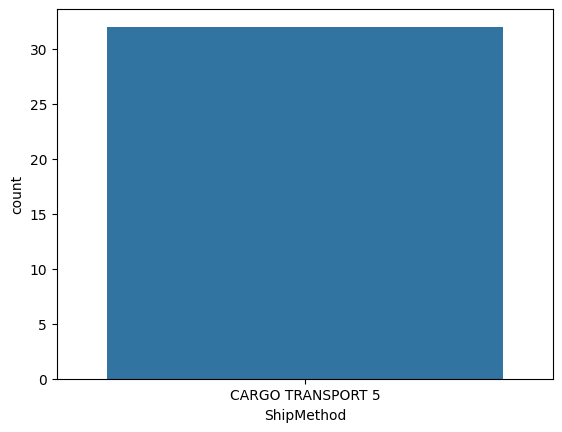

In [66]:
sns.countplot(psdf_sales_order_head.to_pandas(),x='ShipMethod')

In [67]:
psdf_sales_order_head.groupby(['Status']).size()

Status
5    3
1    8
3    7
2    8
4    6
dtype: int64

In [68]:
psdf_sales_order_head.head()

,SalesOrderID,Status,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,SubTotal,TaxAmt,Freight,TotalDue
0,71774,5,SO71774,PO348186287,10-4020-000609,29847,1092,1092,CARGO TRANSPORT 5,880.3484,70.4279,22.0087,972.7850
1,71776,2,SO71776,PO19952192051,10-4020-000106,30072,640,640,CARGO TRANSPORT 5,78.8100,6.3048,1.9703,87.0851
2,71780,1,SO71780,PO19604173239,10-4020-000340,30113,653,653,CARGO TRANSPORT 5,38418.6895,3073.4952,960.4672,42452.6519
3,71782,3,SO71782,PO19372114749,10-4020-000582,29485,1086,1086,CARGO TRANSPORT 5,39785.3304,3182.8264,994.6333,43962.7901
4,71783,4,SO71783,PO19343113609,10-4020-000024,29957,992,992,CARGO TRANSPORT 5,83858.4261,6708.6741,2096.4607,92663.5609


#Merging Customer and Address Tables

In [69]:
psdf_customer.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson
0,1,0,Mr.,Orlando,N.,Gee,None,A Bike Store,pamela0
1,2,0,Mr.,Keith,None,Harris,None,Progressive Sports,david8
2,3,0,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,jillian0
3,4,0,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,jillian0
4,5,0,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,shu0


In [70]:
psdf_customer_addr.head()

,CustomerID,AddressID,AddressType
0,29485,1086,Main Office
1,29486,621,Main Office
2,29489,1069,Main Office
3,29490,887,Main Office
4,29492,618,Main Office


In [71]:
psdf_customer.shape

(847, 9)

In [72]:
psdf_customer_addr.shape

(417, 3)

In [73]:
customer_intermediate = pd.merge(psdf_customer.to_pandas(),psdf_customer_addr.to_pandas(),how='left',on='CustomerID')

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [74]:
customer_final = pd.merge(customer_intermediate,psdf_address.to_pandas(),how='left',on='AddressID')

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [75]:
customer_final.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,AddressID,AddressType,AddressLine1,AddressLine2,City,StateProvince,CountryRegion,PostalCode
0,1,0,Mr.,Orlando,N.,Gee,None,A Bike Store,pamela0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,Mr.,Keith,None,Harris,None,Progressive Sports,david8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,jillian0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,jillian0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,shu0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
customer_final['Suffix']= customer_final['Suffix'].fillna("")
customer_final['MiddleName']=customer_final['MiddleName'].fillna("")
customer_final['Title']=customer_final['Title'].fillna("")
customer_final['FirstName']=customer_final['FirstName'].fillna("")
customer_final['LastName']=customer_final['LastName'].fillna("")

In [77]:
customer_final.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,AddressID,AddressType,AddressLine1,AddressLine2,City,StateProvince,CountryRegion,PostalCode
0,1,0,Mr.,Orlando,N.,Gee,,A Bike Store,pamela0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,Mr.,Keith,,Harris,,Progressive Sports,david8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,Ms.,Donna,F.,Carreras,,Advanced Bike Components,jillian0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,Ms.,Janet,M.,Gates,,Modular Cycle Systems,jillian0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,Mr.,Lucy,,Harrington,,Metropolitan Sports Supply,shu0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
customer_final['name'] = customer_final['Title']+' '+ customer_final['FirstName']+' '+customer_final['MiddleName'] +' '+customer_final['LastName'] +' '+customer_final['Suffix']

In [79]:
customer_final = customer_final.drop(['NameStyle','Title','FirstName','MiddleName','LastName','Suffix'],axis=1)

In [80]:
customer_final = customer_final.fillna("")
customer_final['Full Address'] = customer_final['AddressLine1']+',' + customer_final['AddressLine2']+',' +customer_final['City']+',' +customer_final['StateProvince']+',' +customer_final['CountryRegion']+',' +customer_final['PostalCode']

In [81]:
customer_final=customer_final.drop(['AddressLine1','AddressLine2','City','StateProvince','CountryRegion','PostalCode'],axis=1)


In [82]:
customer_final.tail()

,CustomerID,CompanyName,SalesPerson,AddressID,AddressType,name,Full Address
852,30113,Nearby Cycle Shop,jae0,653.0,Main Office,Mr. Raja D. Venugopal,"Burgess Hill,Edward Way,West Sussex,England,Un..."
853,30115,Retreat Inn,josé1,499.0,Main Office,Ms. Dora P. Verdad,"Suite 2502 410 Albert Street,,Waterloo,Ontario..."
854,30116,Technical Parts Manufacturing,shu0,1044.0,Main Office,Ms. Wanda F. Vernon,"Ontario Mills,,Ontario,California,United State..."
855,30117,Totes & Baskets Company,jillian0,596.0,Main Office,Mr. Robert R. Vessa,"72540 Blanco Rd.,,San Antonio,Texas,United Sta..."
856,30118,World of Bikes,jillian0,595.0,Main Office,Ms. Caroline A. Vicknair,"660 Lindbergh,,Saint Louis,Missouri,United Sta..."


#Merging Customer Final Table with Sales Table

In [83]:
psdf_sales_order_det.head()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal
0,71774,110562,1,836,356.898,0.0,356.898
1,71774,110563,1,822,356.898,0.0,356.898
2,71776,110567,1,907,63.900,0.0,63.900
3,71780,110616,4,905,218.454,0.0,873.816
4,71780,110617,2,983,461.694,0.0,923.388


In [84]:
psdf_sales_order_head.head()

,SalesOrderID,Status,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,SubTotal,TaxAmt,Freight,TotalDue
0,71774,5,SO71774,PO348186287,10-4020-000609,29847,1092,1092,CARGO TRANSPORT 5,880.3484,70.4279,22.0087,972.7850
1,71776,2,SO71776,PO19952192051,10-4020-000106,30072,640,640,CARGO TRANSPORT 5,78.8100,6.3048,1.9703,87.0851
2,71780,1,SO71780,PO19604173239,10-4020-000340,30113,653,653,CARGO TRANSPORT 5,38418.6895,3073.4952,960.4672,42452.6519
3,71782,3,SO71782,PO19372114749,10-4020-000582,29485,1086,1086,CARGO TRANSPORT 5,39785.3304,3182.8264,994.6333,43962.7901
4,71783,4,SO71783,PO19343113609,10-4020-000024,29957,992,992,CARGO TRANSPORT 5,83858.4261,6708.6741,2096.4607,92663.5609


In [85]:
# We dont have a table with SalesOrderNumber , PurchaseOrderNumber and AccountNumber hence will drop
psdf_sales_order_head = psdf_sales_order_head.drop(['SalesOrderNumber','PurchaseOrderNumber','AccountNumber'],axis=1)

In [86]:
psdf_sales_order_head.head()

,SalesOrderID,Status,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,SubTotal,TaxAmt,Freight,TotalDue
0,71774,5,29847,1092,1092,CARGO TRANSPORT 5,880.3484,70.4279,22.0087,972.7850
1,71776,2,30072,640,640,CARGO TRANSPORT 5,78.8100,6.3048,1.9703,87.0851
2,71780,1,30113,653,653,CARGO TRANSPORT 5,38418.6895,3073.4952,960.4672,42452.6519
3,71782,3,29485,1086,1086,CARGO TRANSPORT 5,39785.3304,3182.8264,994.6333,43962.7901
4,71783,4,29957,992,992,CARGO TRANSPORT 5,83858.4261,6708.6741,2096.4607,92663.5609


In [93]:
sales_customer_df = pd.merge(psdf_sales_order_head.to_pandas(),customer_final,on='CustomerID',how='inner').drop(['CustomerID','ShipToAddressID','BillToAddressID','AddressID'],axis=1)

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [94]:
sales_customer_df.tail()

,SalesOrderID,Status,ShipMethod,SubTotal,TaxAmt,Freight,TotalDue,CompanyName,SalesPerson,AddressType,name,Full Address
27,71923,4,CARGO TRANSPORT 5,106.5408,8.5233,2.6635,117.7276,The Bicycle Accessories Company,shu0,Main Office,Mr. Guy Gilbert,"Vista Marketplace,,Alhambra,California,United ..."
28,71935,1,CARGO TRANSPORT 5,6634.2961,530.7437,165.8574,7330.8972,Remarkable Bike Store,linda3,Main Office,Mr. Cory K. Booth,"Eastern Beltway Center,,Las Vegas,Nevada,Unite..."
29,71936,2,CARGO TRANSPORT 5,98278.6910,7862.2953,2456.9673,108597.9536,Metropolitan Bicycle Supply,jae0,Main Office,Mr. Krishna Sunkammurali,"Paramount House,,London,England,United Kingdom..."
30,71938,4,CARGO TRANSPORT 5,88812.8625,7105.0290,2220.3216,98138.2131,Bulk Discount Store,jae0,Main Office,Mr. Christopher R. Beck Jr.,"93-2501, Blackfriars Road,,,London,England,Uni..."
31,71946,2,CARGO TRANSPORT 5,38.9536,3.1163,0.9738,43.0437,Central Bicycle Specialists,jae0,Main Office,Sra. Janeth Esteves,"6 The Farm, Liberty Road,,Maidenhead,England,U..."


In [99]:
sales_customer_df[['SalesPerson','TotalDue']].groupby(['SalesPerson']).sum()

,TotalDue
SalesPerson,
jae0,572496.5594
linda3,231187.9109
shu0,152619.1246
